# Density Estimation example on Cosmic Shear

Example taken from the pre-ran cosmic shear example on pyDelfi:

https://github.com/justinalsing/pydelfi

In [1]:
# Imports
import numpy as np
import torch
#import sys
#sys.path.append("../torchNDE/") 
from torchnde import ConditionalMaskedAutoregressiveFlow
from matplotlib import pyplot as plt

Load the data

In [2]:
compressed_data = np.genfromtxt('../data/cosmic_shear/compressed_data.dat')
sim_params = np.genfromtxt('../data/cosmic_shear/simulations_parameters.dat')
sim_compressed_data = np.genfromtxt('../data/cosmic_shear/simulations_compressed_data.dat')

Create a conditional masked autoregressive flow

In [3]:
maf = ConditionalMaskedAutoregressiveFlow(5, 5, n_mades = 5, hidden_layers=[32, 32])

Convert the data into pytorch

In [4]:
xx = torch.tensor(sim_compressed_data, dtype = torch.float32)
yy = torch.tensor(sim_params, dtype = torch.float32)

Train the MAF

In [5]:
maf.train(xx,yy,n_epochs=10000, lr = 1e-4, verbose = True)

100 tensor(-9.6729, grad_fn=<NegBackward0>)
200 tensor(-12.9588, grad_fn=<NegBackward0>)
300 tensor(-13.9338, grad_fn=<NegBackward0>)
400 tensor(-14.6936, grad_fn=<NegBackward0>)
500 tensor(-14.9276, grad_fn=<NegBackward0>)
600 tensor(-14.7242, grad_fn=<NegBackward0>)
700 tensor(-14.7392, grad_fn=<NegBackward0>)
Training completed after 786 epochs.


Use the MAF to generate 10000 random samples

In [6]:
x = maf.gen(torch.tensor(compressed_data, dtype=torch.float32), 10000).detach().numpy()

Use GetDist (https://getdist.readthedocs.io/en/latest/) to plot the samples

In [7]:
from getdist import  plots, MCSamples

In [8]:
ndim = 5
names = ["omegam", "S8", "omegab", "h", "ns"]
labels =  ["\Omega_m", "S_8", "\Omega_b", "h", "n_s"]
samps = MCSamples(samples = x, names = names, labels = labels)

Removed no burn in


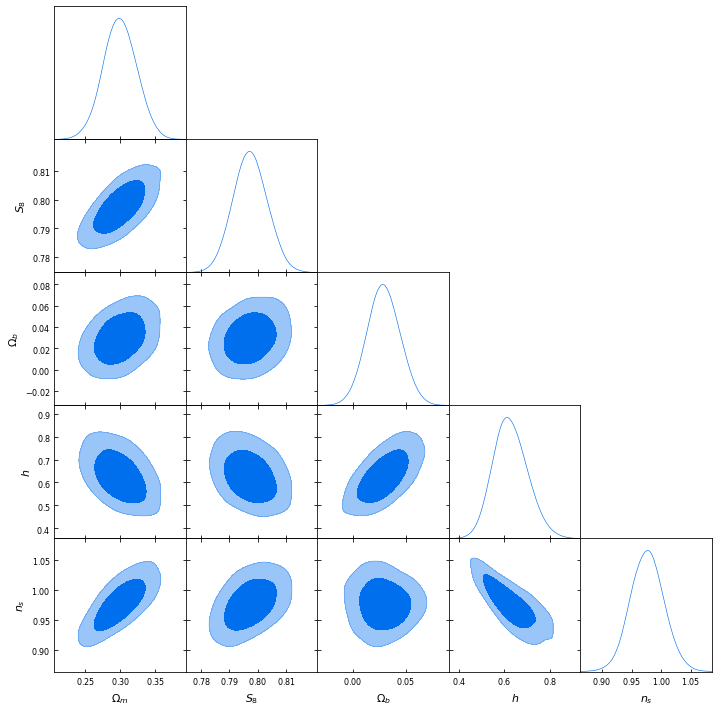

In [9]:
g = plots.get_subplot_plotter()
g.triangle_plot([samps], filled=True)